# Tutorial, python acoustics

---

## Python install via conda

Download Miniconda2 from the [conda website](https://conda.io/miniconda.html)
(Python 2.7) and install:
```
bash Miniconda2-latest-Linux-x86_64.sh
bash
conda update conda
conda create --name acoustic python
source activate acoustic
conda install numpy -c conda-forge
conda install scipy -c conda-forge
conda install pandas -c conda-forge
conda install matplotlib -c conda-forge
conda install jupyter -c conda-forge
```

---

## Download other useful libraries (for this tutorial and examples)


```
git clone https://github.com/apatlpo/cognac.git
git clone https://github.com/AllenDowney/ThinkDSP.git
```


In [1]:
# import libraries

import numpy as np
import scipy
import matplotlib.pyplot as plt
%matplotlib inline
#from wave import open as open_wave
import thinkdsp, thinkplot


# The doc for these libraries are easily found by googling them.
# We'll use the wave library to read .wav files which is a built-in library, see:
#   https://docs.python.org/2/library/wave.html


---

## Open and read a wave file


In [2]:
# open wave file
myfile = 'channelA_2016-08-31_11-56-24.wav' 
wave = thinkdsp.read_wave(myfile)

print wave
dir(wave)


<thinkdsp.Wave instance at 0x111a6bf38>


['__add__',
 '__doc__',
 '__init__',
 '__len__',
 '__module__',
 '__mul__',
 '__or__',
 '__radd__',
 'apodize',
 'convolve',
 'copy',
 'corr',
 'cos_cov',
 'cos_transform',
 'cov',
 'cov_mat',
 'cumsum',
 'diff',
 'duration',
 'end',
 'find_index',
 'framerate',
 'get_xfactor',
 'hamming',
 'make_audio',
 'make_dct',
 'make_spectrogram',
 'make_spectrum',
 'max_diff',
 'normalize',
 'play',
 'plot',
 'plot_vlines',
 'quantize',
 'roll',
 'scale',
 'segment',
 'shift',
 'slice',
 'start',
 'truncate',
 'ts',
 'unbias',
 'window',
 'write',
 'ys',
 'zero_pad']

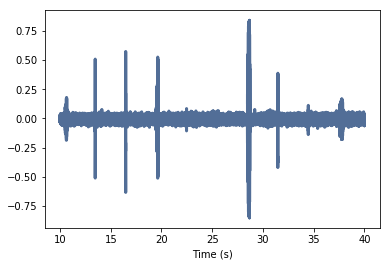

In [3]:
# play wave file
#wav.make_audio()
#from IPython.display import Audio
#audio = Audio(data=wave.ys, rate=wave.framerate)
#audio

# does not go through for large files, hence reduce to a segment
start = 10. # in s
duration = 30. # in s
segment = wave.segment(start, duration)
# play
segment.make_audio()
# plot
segment.plot()
thinkplot.config(xlabel='Time (s)')


---

## Compute spectra and spectrogram


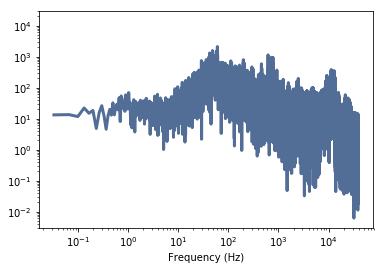

In [4]:
# compute spectrum and plot it
spectrum = segment.make_spectrum()
spectrum.plot()
#thinkplot.config(xlabel='Frequency (Hz)')
thinkplot.config(xlabel='Frequency (Hz)', xscale='log', yscale='log')

('Time resolution (s)', 0.0016384)
('Frequency resolution (Hz)', 610.3515625)


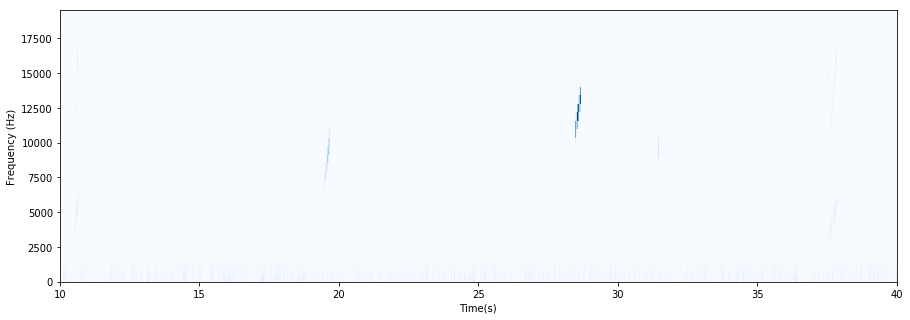

In [5]:
# compute spectrogram and plot it
spectrogram = segment.make_spectrogram(128)
print('Time resolution (s)', spectrogram.time_res)
print('Frequency resolution (Hz)', spectrogram.freq_res)
spectrogram.plot(high=20.e3)
thinkplot.config(xlabel='Time(s)', ylabel='Frequency (Hz)')
fig = plt.gcf()
fig.set_size_inches(15., 5.)

---

## Compute convolution


('Time resolution (s)', 0.0016384)
('Frequency resolution (Hz)', 610.3515625)


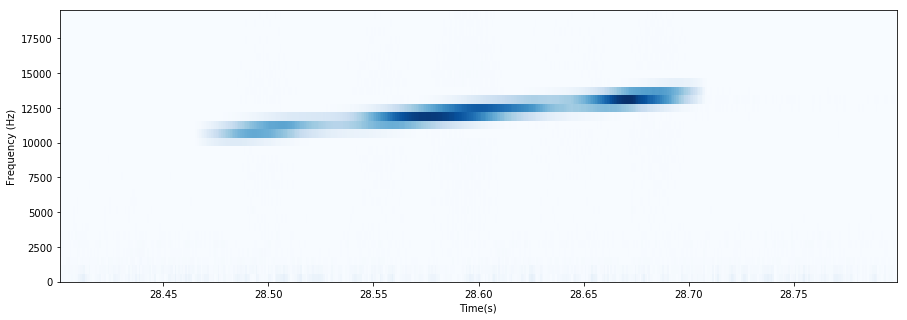

In [6]:
# select a segment with signal of interest
signal = wave.segment(28.4, .4)
spectrogram = signal.make_spectrogram(128)
print('Time resolution (s)', spectrogram.time_res)
print('Frequency resolution (Hz)', spectrogram.freq_res)
spectrogram.plot(high=20.e3)
thinkplot.config(xlabel='Time(s)', ylabel='Frequency (Hz)')
fig = plt.gcf()
fig.set_size_inches(15., 5.)

In [7]:
# compute convolution with another signal
conv = segment.convolve(signal)
print conv

<thinkdsp.Wave instance at 0x1169c0710>


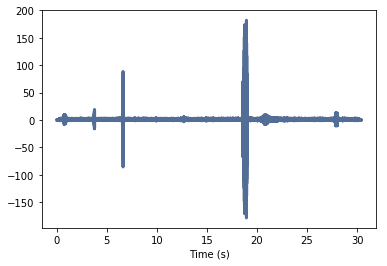

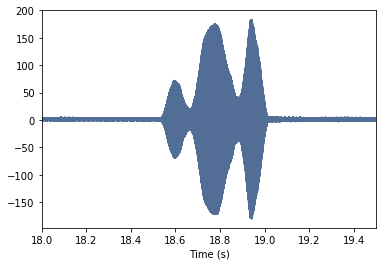

In [15]:
conv.plot()
thinkplot.config(xlabel='Time (s)')

plt.show()
conv.plot()
thinkplot.config(xlabel='Time (s)',xlim=(18.,19.5))


In [9]:
help(wave.convolve)

Help on method convolve in module thinkdsp:

convolve(self, other) method of thinkdsp.Wave instance
    Convolves two waves.
    
    Note: this operation ignores the timestamps; the result
    has the timestamps of self.
    
    other: Wave or NumPy array
    
    returns: Wave



In [10]:
help(thinkplot.plot)

Help on function Plot in module thinkplot:

Plot(obj, ys=None, style='', **options)
    Plots a line.
    
    Args:
      obj: sequence of x values, or Series, or anything with Render()
      ys: sequence of y values
      style: style string passed along to plt.plot
      options: keyword args passed to plt.plot

